## Bagaimana membuat model menjadi lebih bagus?

1. Kalau memungkinkan, kita tambah data (row / kolom)
2. Feature engineering - membuat feature / parameter baru dari parameter yang sudah ada
3. Mencoba lebih dari 1 model machine learning, pilih model terbaik

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memisahkan training data dan testing data
from sklearn.model_selection import train_test_split

# Fungsi untuk memanggil model Machine Learning
from sklearn.linear_model import LogisticRegression

# Fungsi untuk melakukan normalisasi dan standardisasi data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Fungsi untuk menghitung evaluation metrics
from sklearn import metrics, datasets

## Penjelasan Logistic Regression

- Contoh disini kita akan melakukan training model Logistic Regression tanpa melakukan standarisasi data agar lebih mudah dipahami
- Label yang digunakan adalah `University Class`, memiliki nilai 0 dan 1 (0 untuk universitas non-unggulan, dan 1 untuk universitas unggulan)

In [13]:
# Import the data
data = pd.read_csv('http://bit.ly/dwp-data-university')

# Tranform the data using Label Encoding
def convert_research(row):
    if row['Research'] == 'Y':
        return 1
    return 0

data['Research'] = data.apply(convert_research, axis=1)

# Define x / feature / parameter dan y / label / target
x = data.drop(columns=['University Class'])
y = data['University Class']

# Split the training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initiate the model
model = LogisticRegression()

# Training process
model.fit(x_train, y_train)

# Testing process and evaluation
y_pred = model.predict(x_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: {}'.format(accuracy_score))

Accuracy Score: 0.9090909090909091


C:\Users\960083.G7481X54_960083\.conda\envs\h8\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


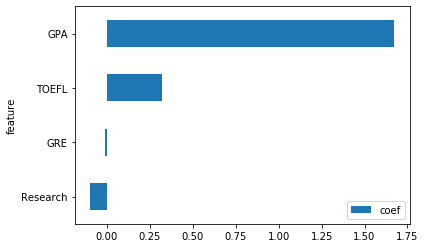

In [21]:
coef = pd.DataFrame({'feature': list(x.columns),
                     'coef': list(model.coef_[0])}).sort_values(by='coef')

coef.plot.barh(x='feature', y='coef')

- Koefisien di tiap model bisa didapatkan dengan `model.coef_`
- Kita dapat melihat bahwa **GPA adalah feature yang paling berpengaruh terhadap hasil**

In [23]:
print(list(x.columns))
print(model.coef_[0])

['GRE', 'TOEFL', 'GPA', 'Research']
[-0.00815679  0.32385528  1.67317601 -0.09832854]


- Perlu diingat, Logistic Regression sebenarnya adalah **persamaan Linear Regression yang diberikan fungsi sigmoid**, sehingga output yang dihasilkan adalah tingkat probabilitas yang memiliki range dari 0 - 1
- Fungsi sigmoid dapat dituliskan sebagai berikut:

In [24]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [ ]:
x1b1 + x2b2 + x3b3 = >>>

In [28]:
print(sigmoid(1))
print(sigmoid(2))
print(sigmoid(3))

0.7310585786300049
0.8807970779778823
0.9525741268224334


- Dapat dilihat bahwa semakin tinggi nilai yang dimasukan pada fungsi sigmoid, semakin tinggi juga nilai yang dihasilkan (probabilitas mendekati 1)
- Hal tersebut menunjukan, semakin positif nilai koefisien pada sebuah feature maka semakin berpengaruh dia memberikan hasil 1, begitu juga sebaliknya, semakin negatif nilai koefisien sebuah feature maka semakin berpengaruh dia memberikan hasil 0
- Dalam kasus di atas, karena feature GPA memiliki koefisien positif paling tinggi, menandakan bahwa semakin tinggi GPA yang dimiliki, kemungkinan bahwa mahasiswa tersebut berasal dari universitas unggulan (`University Class` = 1) semakin tinggi

Berikut contoh bahwa dengan menaikan nilai GPA, maka kemungkinan dia berada di `University Class` = 1 juga semakin tinggi

In [60]:
x_train.sample()

,GRE,TOEFL,GPA,Research
6,322,109,8.8,0


In [61]:
model.predict([[332, 109, 8.8, 0]])

array([1], dtype=int64)

In [62]:
model.predict_proba([[332, 109, 8.8, 0]])

array([[0.15113563, 0.84886437]])

In [63]:
model.predict_proba([[332, 109, 8.8, 1]])

array([[0.16418778, 0.83581222]])

### Cara mem-predict data baru

In [65]:
data_baru = x_train.sample(5)

data_baru

,GRE,TOEFL,GPA,Research
60,296,101,7.68,0
6,322,109,8.80,0
24,331,116,9.38,1
67,336,118,9.19,1
91,310,110,7.23,1


In [90]:
prediction = pd.DataFrame(model.predict(data_baru), columns=['University Class Prediction'])

prediction

,University Class Prediction
0,0
1,1
2,1
3,1
4,0


## Confusion Matrix

Metrics yang digunakan pada use case Classification:
- Precision
- Recall
- F1 Score
- Accuracy

In [92]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.94      0.94      0.94        17

    accuracy                           0.91        22
   macro avg       0.87      0.87      0.87        22
weighted avg       0.91      0.91      0.91        22



In [101]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('TP: {}'.format(tp))

TN: 4
FP: 1
FN: 1
TP: 16


In [97]:
pd.DataFrame({'actual': list(y_test),
              'prediction': list(y_pred)})

,actual,prediction
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


#### Precision

TP / (TP + FP)

In [104]:
metrics.precision_score(y_test, y_pred)

0.9411764705882353

In [106]:
16 / (16 + 1)

0.9411764705882353

#### Recall

TP / (FN + TP)

In [105]:
metrics.recall_score(y_test, y_pred)

0.9411764705882353

In [107]:
16 / (16 + 1)

0.9411764705882353

#### F1 Score

2.((precision.recall)/(precision+recall))

In [108]:
metrics.f1_score(y_test, y_pred)

0.9411764705882353

#### Accuracy

(TP + TN) / (TP + TN + FP + FN)

In [109]:
metrics.accuracy_score(y_test, y_pred)

0.9090909090909091

## Multiclass Logistic Regression

In [112]:
data_iris = datasets.load_iris()

In [124]:
# Define x / feature/ parameters
x = pd.DataFrame(data_iris['data'], columns=data_iris['feature_names'])
y = pd.DataFrame(data_iris['target'], columns=['type'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Initiate and train the model
model = LogisticRegression()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score: {}'.format(accuracy))

Accuracy score: 0.8333333333333334


C:\Users\960083.G7481X54_960083\.conda\envs\h8\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
model.coef_

array([[-1.04902721,  1.02502481, -1.78547737, -1.64014386],
       [ 0.66348067, -0.41779159, -0.36424012, -0.7697209 ],
       [ 0.38554653, -0.60723322,  2.14971749,  2.40986476]])

In [126]:
model.intercept_

array([-0.4547459 ,  1.76572446, -1.31097856])

In [127]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



## Assignment 3 - Machine Learning

Buat model Machine Learning (Linear Regression) untuk melakukan prediksi nilai "charges" dari dataset `insurance`. <br>

Deadline: **1 Oktober 2020 , 23:59**

In [130]:
insurance = pd.read_csv('http://bit.ly/dwp-data-insurance')

In [131]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
